# Notebook Context

## Question:
<font size="5">
What is the difference in performance between a DeepLabV3+ trained on polar data representation and a DeepLabV3+ model trained on carthesian data representation?
</font>

## Answer:
<font size="5">
For the DeepLabV3+ architecture, training on polar transformation of the data yields a bump in performance of approximately 10% compared to the training performed on the carthesian representation of the data.
</font>


In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from pprint import pprint

# %matplotlib widget

In [2]:
def load_experiment_config(experiment_config_path):
    experiment_config = pkl.load(open(experiment_config_path, "rb"))
    pprint(experiment_config)
    return experiment_config

In [3]:
def load_experiment_data(experiment_data_path):
    experiment_history = pd.read_csv(experiment_data_path, header=0)
    pprint(experiment_history.columns)
    return experiment_history    

In [4]:
def extract_training_coordinates(experiment_config):
    if "polar_training" not in experiment_config["training_config"].keys():
        training_coodinates = "carthesian"
    elif experiment_config["training_config"]["polar_training"]:
        training_coodinates = "polar"
    else:
        training_coodinates = "carthesian"
    
    return training_coodinates

In [5]:
def plot_train_val_metrics(experiment_config, experiment_data, train_metric_names, val_metric_names):
    
    best_metrics = {}
    plt.figure(figsize=(10, 7))
    
    for train_metric_name, val_metric_name in zip(train_metric_names, val_metric_names):
        plt.plot(experiment_data[train_metric_name], label=train_metric_name)
        plt.plot(experiment_data[val_metric_name], label=val_metric_name)
        best_metrics[train_metric_name] = np.round(experiment_data[train_metric_name].max(), 4)
        best_metrics[val_metric_name] = np.round(experiment_data[val_metric_name].max(), 4)

    training_coordinates = extract_training_coordinates(experiment_config)
    
    plt.grid("on")
    start, end = plt.ylim()
    plt.yticks(np.arange(start, end, step=0.02))
    plt.title(f"Model: {experiment_config['model_config']['model']} Transformation: {training_coordinates}")
    plt.xlabel("Training Epochs")
    plt.ylabel("Metric Mangitude")
    plt.legend()
    plt.show()

In [6]:
def plot_cross_experiments_metrics(experiment_configs, experiments_data, metric_names):
    
    plt.figure(figsize=(10, 7))
    
    for metric_name in metric_names:
        for experiment_config, experiment_data in zip(experiment_configs, experiments_data):
            training_coordinates = extract_training_coordinates(experiment_config)
            plt.plot(experiment_data[metric_name], label=f"{metric_name} - {experiment_config['model_config']['model']} - {training_coordinates}")
    
    plt.grid("on")
    start, end = plt.ylim()
    plt.yticks(np.arange(start, end, step=0.02))
    plt.title(f"Cross-Model Comparison")
    plt.xlabel("Training Epochs")
    plt.ylabel("Metric Mangitude")
    plt.legend(ncol=2)
    plt.show()

# Lesion Segmentation Performance

## Investigate performance of liver tumor segmentation for a DeepLabV3+ model

In [9]:
EXPERIMENTS_ROOT_PATH = "../experiments_data/set_6/lesion/experiment_12/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
lesion_experiment_config_12 = load_experiment_config(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
lesion_experiment_history_12 = load_experiment_data(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model': 'deeplab_plus',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
       

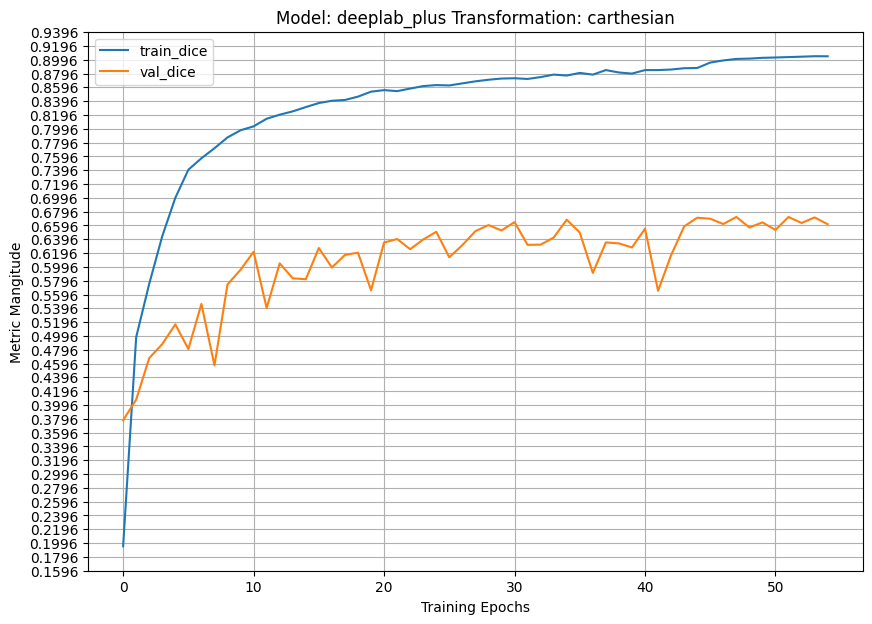

In [10]:
plot_train_val_metrics(
    experiment_config=lesion_experiment_config_12,
    experiment_data = lesion_experiment_history_12,
    train_metric_names=["train_dice"],
    val_metric_names=["val_dice"]
)

## Cross Experiments

<font size="5">
Compare performance of model trained on carthesian coordinates vs model trained on polar coordinates
</font>

In [12]:
EXPERIMENTS_ROOT_PATH = "../experiments_data/set_6/lesion/experiment_13/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
lesion_experiment_config_13 = load_experiment_config(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_CONFIG_NAME))
lesion_experiment_config_13['model_config']['model'] = "custom_unet"

# Load experiment_history
lesion_experiment_history_13 = load_experiment_data(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model': 'deeplab_plus',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
       

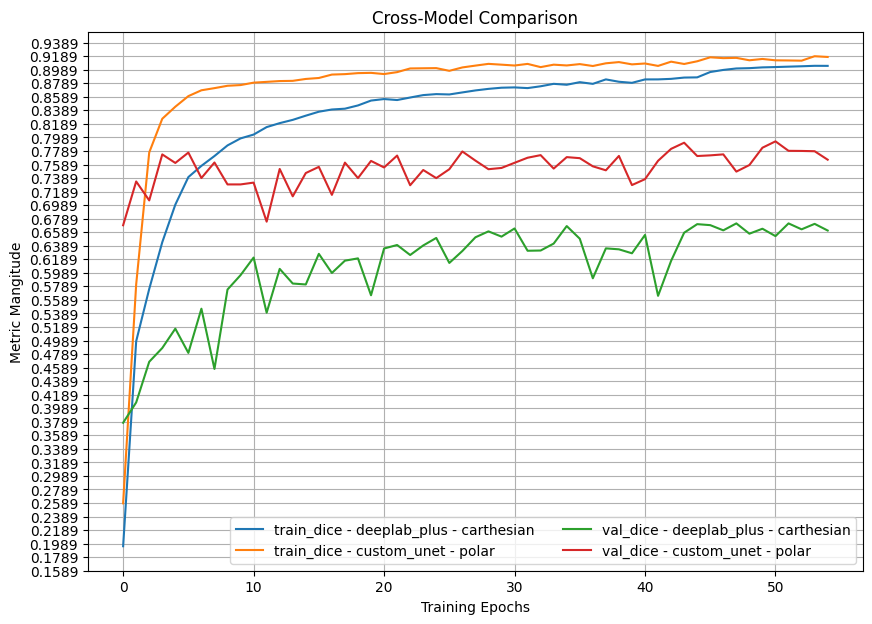

In [13]:
plot_cross_experiments_metrics(
    experiment_configs=[lesion_experiment_config_12, lesion_experiment_config_13],
    experiments_data=[lesion_experiment_history_12, lesion_experiment_history_13],
    metric_names=["train_dice", "val_dice"]
    )